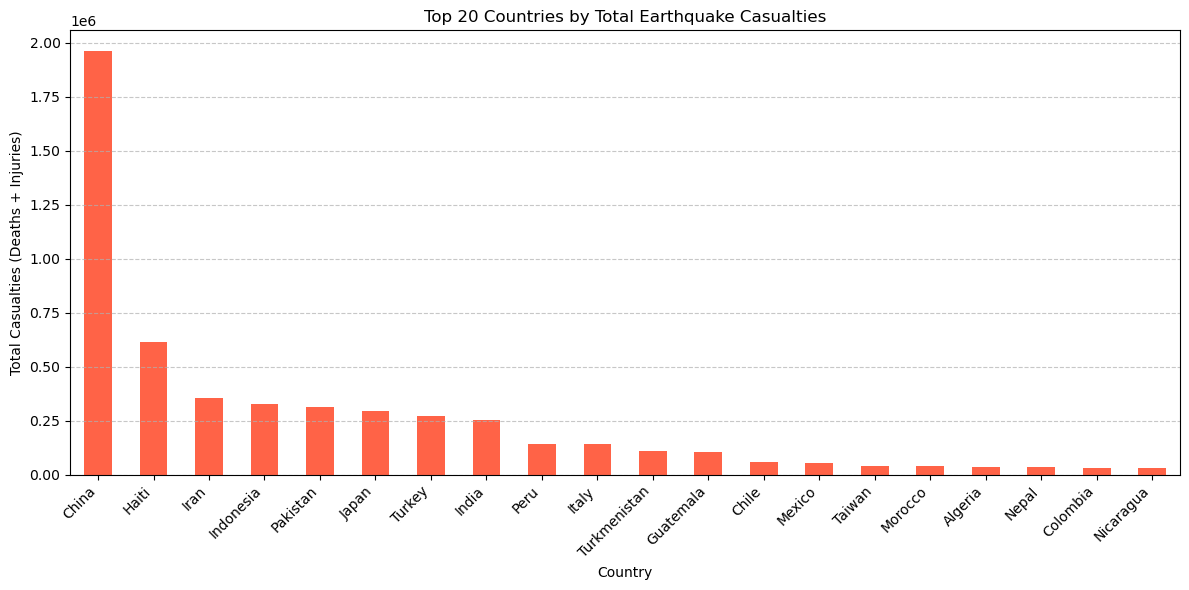

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
quake_df = pd.read_csv("cleaned_data/Global_earthquake-cleaned.csv")
pop_df = pd.read_csv("cleaned_data/population_density_cleaned.csv")

# Work on a copy of the earthquake dataset (do not modify the original)
df = quake_df.copy()

# Extract country name from "Location Name" by splitting on colon
df["Country"] = df["Location Name"].str.split(":").str[0].str.strip().str.title()

# Fill missing values in casualty-related columns with 0
df["Total Deaths"] = df["Total Deaths"].fillna(0)
df["Total Injuries"] = df["Total Injuries"].fillna(0)

# Calculate total casualties
df["Total Casualties"] = df["Total Deaths"] + df["Total Injuries"]

# Filter out earthquakes with no casualties
df = df[df["Total Casualties"] > 0]

# Aggregate total casualties by country and select top 20
country_casualties = df.groupby("Country")["Total Casualties"].sum().sort_values(ascending=False).head(20)

# Plot bar chart
plt.figure(figsize=(12, 6))
country_casualties.plot(kind="bar", color="tomato")
plt.title("Top 20 Countries by Total Earthquake Casualties")
plt.ylabel("Total Casualties (Deaths + Injuries)")
plt.xlabel("Country")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


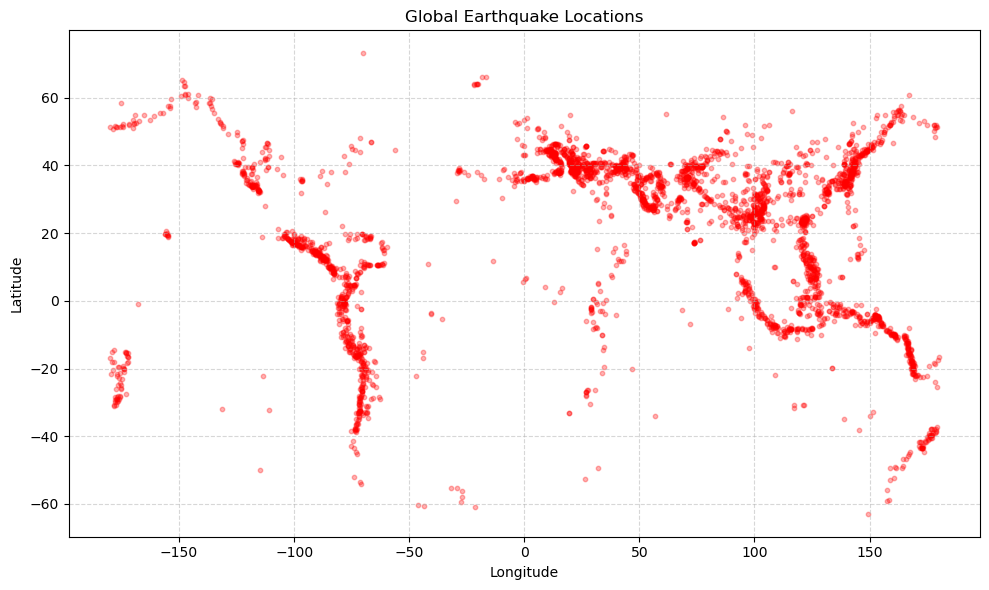

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load original earthquake dataset
quake_df = pd.read_csv("cleaned_data/Global_earthquake-cleaned.csv")

# Create a copy to work with
df = quake_df.copy()

# Filter out rows without valid coordinates
df = df.dropna(subset=["Latitude", "Longitude"])

# Plot earthquake locations on a scatter plot (as heatmap-style overlay)
plt.figure(figsize=(10, 6))
plt.scatter(df["Longitude"], df["Latitude"], alpha=0.3, s=10, c="red")
plt.title("Global Earthquake Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


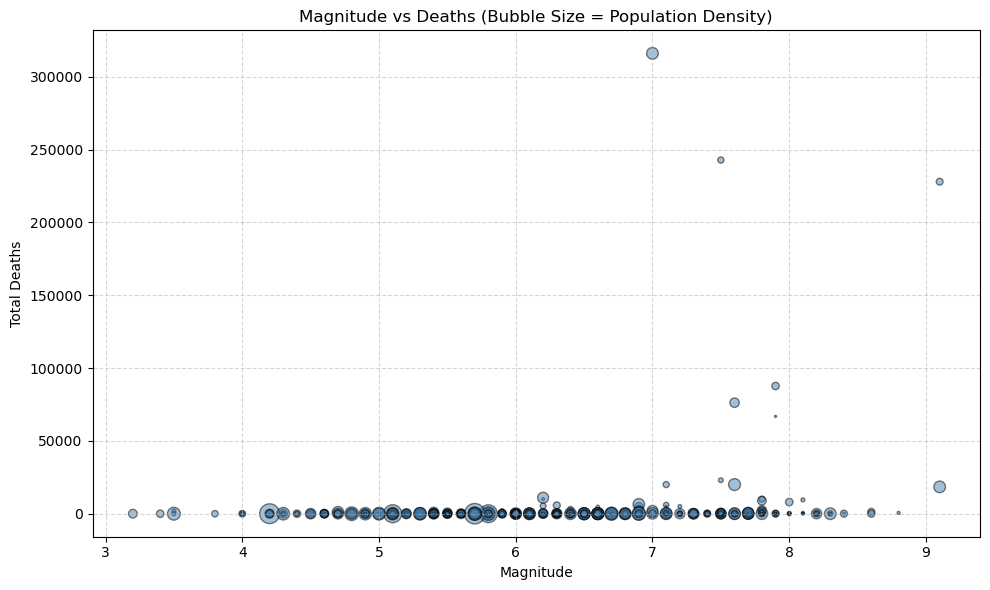

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load both datasets
quake_df = pd.read_csv("cleaned_data/Global_earthquake-cleaned.csv")
pop_df = pd.read_csv("cleaned_data/population_density_cleaned.csv")

# Prepare a copy of earthquake data with necessary columns
df = quake_df.copy()
df = df[["Year", "Location Name", "Mag", "Total Deaths"]]
df = df.dropna(subset=["Mag", "Total Deaths"])

# Extract country name from "Location Name"
df["Country"] = df["Location Name"].str.split(":").str[0].str.strip().str.title()

# Join with population density by Country and Year
pop_df["Country"] = pop_df["Country Name"].str.strip().str.title()
merged_df = pd.merge(df, pop_df, how="left", left_on=["Country", "Year"], right_on=["Country", "Year"])

# Drop missing population density
merged_df = merged_df.dropna(subset=["Population Density"])

# Create scatter plot: Magnitude vs Deaths, size by Population Density
plt.figure(figsize=(10, 6))
plt.scatter(
    merged_df["Mag"], 
    merged_df["Total Deaths"], 
    s=merged_df["Population Density"] * 0.2, 
    alpha=0.5, 
    color="steelblue", 
    edgecolor="black"
)
plt.title("Magnitude vs Deaths (Bubble Size = Population Density)")
plt.xlabel("Magnitude")
plt.ylabel("Total Deaths")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd
import plotly.express as px

# Load data
quake_df = pd.read_csv("cleaned_data/Global_earthquake-cleaned.csv")
pop_df = pd.read_csv("cleaned_data/population_density_cleaned.csv")

# Clean earthquake data
df = quake_df.copy()
df = df.dropna(subset=["Latitude", "Longitude", "Mag", "Total Deaths", "Year"])
df["Country"] = df["Location Name"].str.split(":").str[0].str.strip().str.title()

# Clean population data
pop_df["Country"] = pop_df["Country Name"].str.strip().str.title()

# Merge by Country and Year
merged = pd.merge(df, pop_df, how="left", left_on=["Country", "Year"], right_on=["Country", "Year"])
merged = merged.dropna(subset=["Population Density"])

# Build the interactive bubble map
fig = px.scatter_geo(
    merged,
    lat="Latitude",
    lon="Longitude",
    color="Total Deaths",
    size="Mag",
    hover_name="Country",
    hover_data={
        "Year": True,
        "Mag": True,
        "Total Deaths": True,
        "Population Density": True
    },
    projection="natural earth",
    color_continuous_scale="Reds",
    title="Earthquake Events (Size = Magnitude, Color = Deaths)"
)

fig.update_layout(
    geo=dict(showland=True, landcolor="lightgray"),
    margin={"r":0,"t":40,"l":0,"b":0}
)

fig.show()



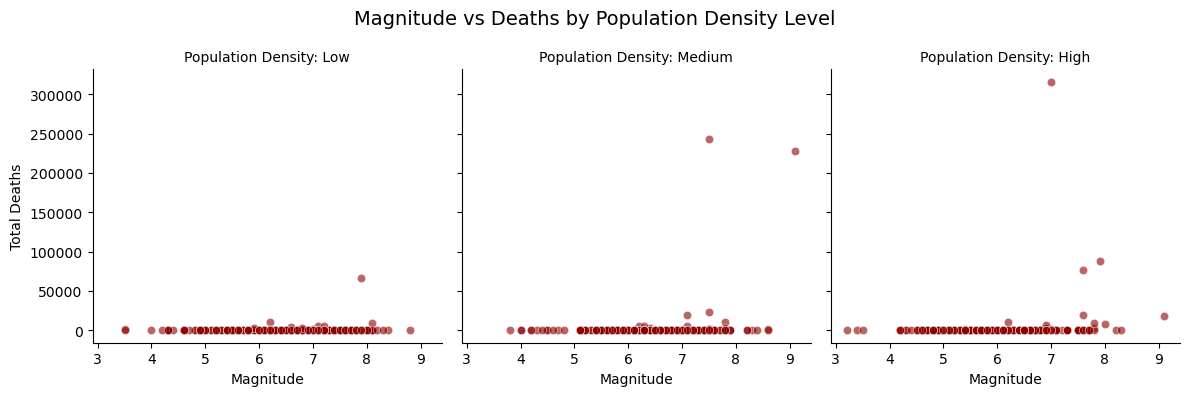

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare merged data
df = quake_df.copy()
df = df[["Year", "Location Name", "Mag", "Total Deaths"]].dropna()
df["Country"] = df["Location Name"].str.split(":").str[0].str.strip().str.title()
pop_df["Country"] = pop_df["Country Name"].str.strip().str.title()
merged = pd.merge(df, pop_df, how="left", on=["Country", "Year"]).dropna(subset=["Population Density"])

# Create population density level (low, medium, high)
merged["PopDensityLevel"] = pd.qcut(merged["Population Density"], q=3, labels=["Low", "Medium", "High"])

# Plot facet grid
g = sns.FacetGrid(merged, col="PopDensityLevel", height=4, aspect=1)
g.map_dataframe(sns.scatterplot, x="Mag", y="Total Deaths", alpha=0.6, color="darkred")
g.set_axis_labels("Magnitude", "Total Deaths")
g.set_titles("Population Density: {col_name}")
g.fig.suptitle("Magnitude vs Deaths by Population Density Level", fontsize=14)
plt.tight_layout()
plt.show()


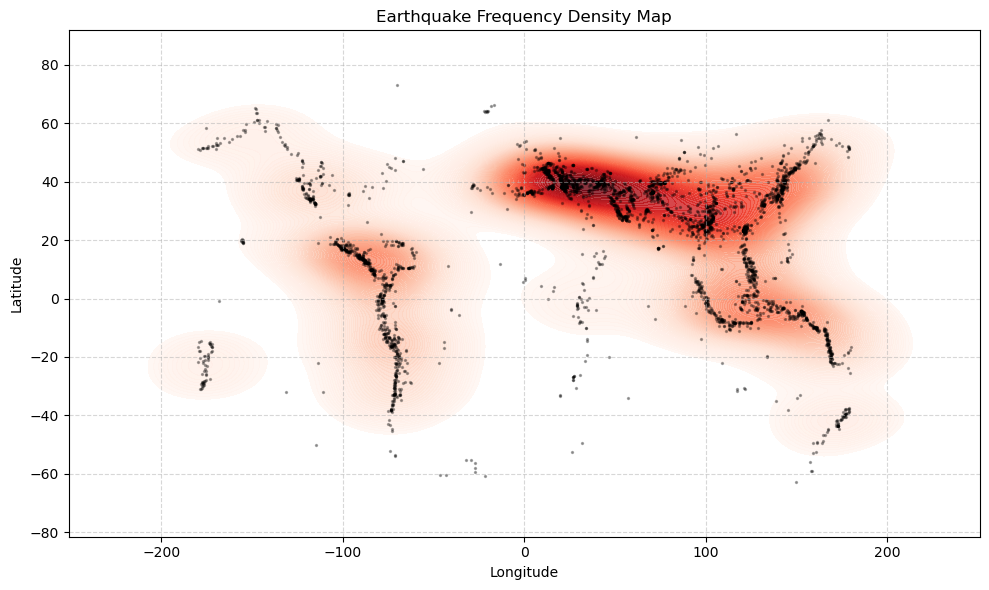

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter earthquake data with coordinates
df = quake_df.dropna(subset=["Latitude", "Longitude"])

# Plot density contour
plt.figure(figsize=(10, 6))
sns.kdeplot(
    x=df["Longitude"],
    y=df["Latitude"],
    fill=True,
    thresh=0.05,
    cmap="Reds",
    levels=100,
    alpha=0.8
)
plt.scatter(df["Longitude"], df["Latitude"], s=2, color="black", alpha=0.3)
plt.title("Earthquake Frequency Density Map")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


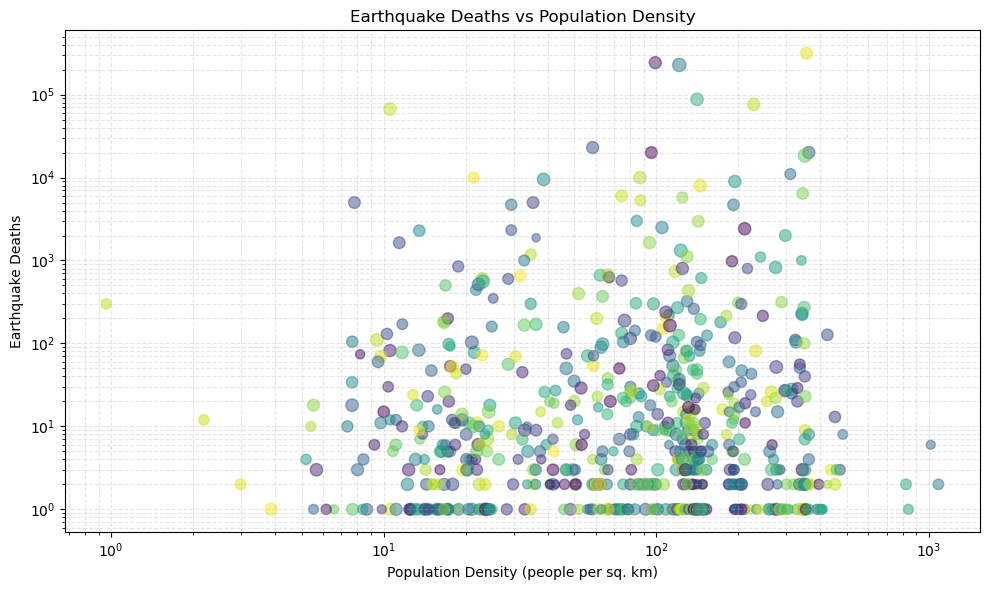

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
quake_df = pd.read_csv("cleaned_data/Global_earthquake-cleaned.csv")
pop_df = pd.read_csv("cleaned_data/population_density_cleaned.csv")

# Prepare earthquake + population data
df = quake_df.copy()
df = df[["Year", "Location Name", "Mag", "Total Deaths"]].dropna()
df["Country"] = df["Location Name"].str.split(":").str[0].str.strip().str.title()
pop_df["Country"] = pop_df["Country Name"].str.strip().str.title()

# Merge datasets
merged = pd.merge(df, pop_df, on=["Country", "Year"], how="left")
merged = merged.dropna(subset=["Population Density", "Total Deaths"])

# Avoid log(0) by filtering out zero deaths and density
merged = merged[(merged["Population Density"] > 0) & (merged["Total Deaths"] > 0)]

# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    merged["Population Density"],
    merged["Total Deaths"],
    s=merged["Mag"] * 10,
    c=np.random.rand(len(merged)),  # random colors
    alpha=0.5,
    cmap="viridis"
)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Population Density (people per sq. km)")
plt.ylabel("Earthquake Deaths")
plt.title("Earthquake Deaths vs Population Density")
plt.grid(True, which="both", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()
